In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook

# Linear Regression with multivariable

In [1]:
# Load data
data = np.loadtxt(r'D:\M.eng\Machine learning\ML_test_byme\data\LinearRegressionData.txt') #load data
# y = 1, x = 2 - 5
X = data[:, 1:6] #select column for data (ต้องถามว่าอะไรคือ X,y)
y = data[:, 0]
m = y.size

# print out some data points
print('y','X[:,1]', 'X[:, 2]','X[:, 3]','X[:, 4]','X[:, 5]')
print('-'*26)
# print(f'{X[0, 4] = }') #print X specific row and column
for i in range(10): #เอา 10 ข้อมูลแรก
    print(y[i],X[i, 0], X[i,1],X[i,2],X[i,3],X[i,4])

NameError: name 'np' is not defined

In [ ]:
X

array([[9.50000e+00, 2.54000e-02, 5.55000e+01, 4.32840e-03, 1.28412e+02],
       [1.97000e+01, 5.08000e-02, 7.13000e+01, 3.41183e-02, 1.21885e+02],
       [0.00000e+00, 1.52400e-01, 7.13000e+01, 1.59880e-03, 1.20247e+02],
       ...,
       [1.74000e+01, 2.54000e-02, 3.17000e+01, 1.76631e-02, 1.31796e+02],
       [0.00000e+00, 1.01600e-01, 7.13000e+01, 1.21072e-03, 1.30795e+02],
       [1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02, 1.14554e+02]],
      shape=(1500, 5))

In [ ]:
y

array([ 5000.,  1000., 10000., ...,  1000.,  5000.,  1600.], shape=(1500,))

<blockquote> Plot data

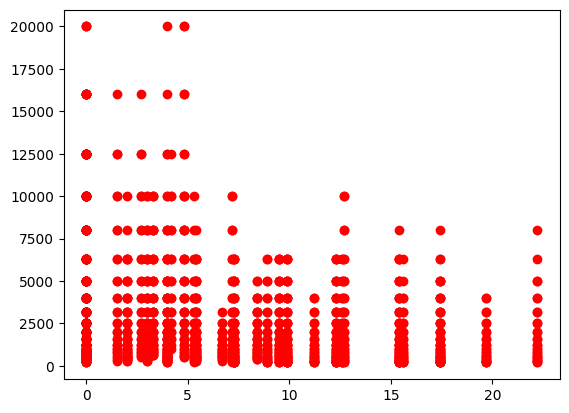

In [ ]:
X1 = data[:,1]
X2 = data[:,2]
X3 = data[:,3]
X4 = data[:,4]
X5 = data[:,5]
plt.plot(X1,y,'ro')

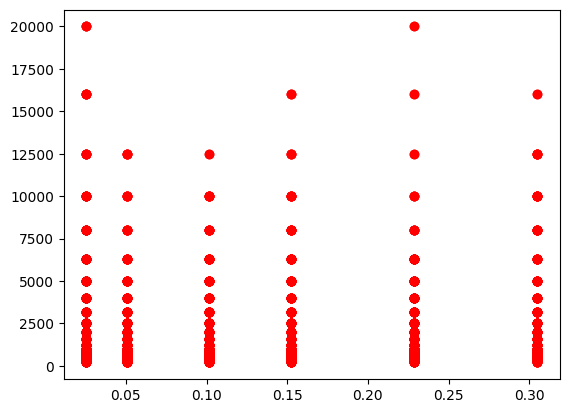

In [ ]:
plt.plot(X2,y,'ro')

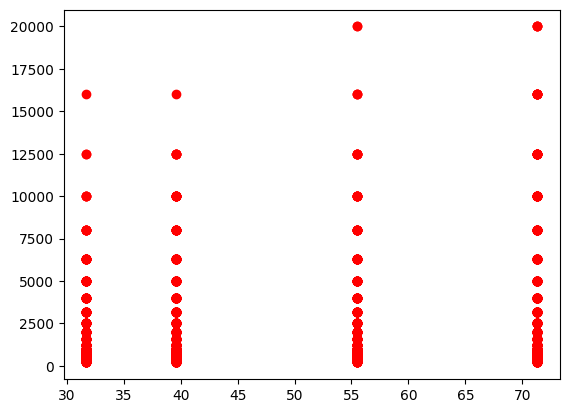

In [ ]:
plt.plot(X3,y,'ro')

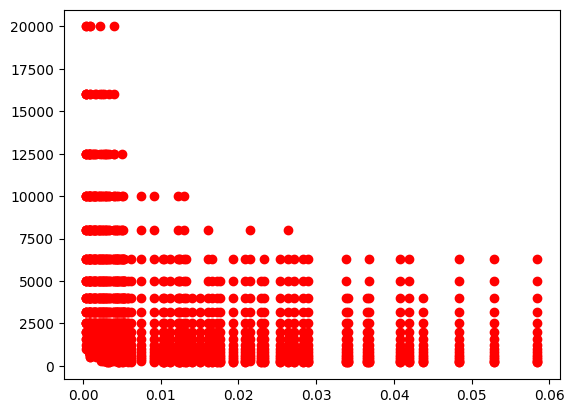

In [ ]:
plt.plot(X4,y,'ro')

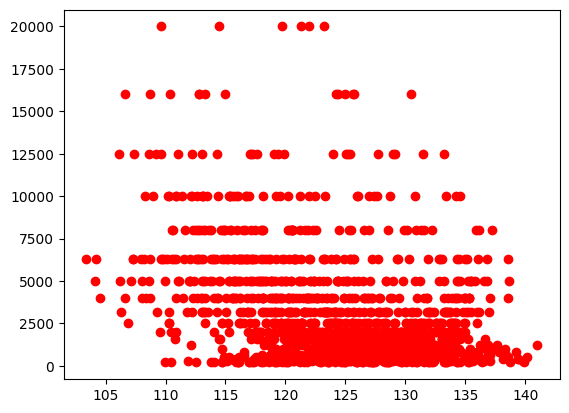

In [ ]:
plt.plot(X5,y,'ro')

<blockquote> Mean Normalization adjust scaling

In [ ]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You need to perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X = data[:, 1:6] 
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    print(mu)
    sigma = np.zeros(X.shape[1])
    print(sigma)

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis=0) #ต้องเอาทุก row มาเฉลี่ยกัน ดังนั้นต้องใช้ axis0
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    # ================================================================
    return X_norm, mu, sigma

In [ ]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
Computed mean: [6.78993333e+00 1.36516533e-01 5.08515333e+01 1.11515702e-02
 1.24833257e+02]
Computed standard deviation: [5.91663407e+00 9.34716257e-02 1.55710463e+01 1.31543998e-02
 6.89923323e+00]


In [ ]:
X_norm[:5]

array([[ 0.45804196, -1.18877288,  0.29853271, -0.51869871,  0.5187161 ],
       [ 2.18199512, -0.91703266,  1.31323652,  1.74593522, -0.42733106],
       [-1.14760069,  0.16992822,  1.31323652, -0.72620343, -0.66474875],
       [-0.89407817,  1.80036953,  1.31323652, -0.59176248,  0.16795248],
       [-0.47154063,  0.98514887, -0.72259327, -0.48756008, -1.53412072]])

In [ ]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1) #เอาคอลัมน์ [1, 1, 1, ...] มารวมกับ metrix X_norm 
#axis = 0 is rows, axis=1 is columns

In [ ]:
X[:5]

array([[ 1.        ,  0.45804196, -1.18877288,  0.29853271, -0.51869871,
         0.5187161 ],
       [ 1.        ,  2.18199512, -0.91703266,  1.31323652,  1.74593522,
        -0.42733106],
       [ 1.        , -1.14760069,  0.16992822,  1.31323652, -0.72620343,
        -0.66474875],
       [ 1.        , -0.89407817,  1.80036953,  1.31323652, -0.59176248,
         0.16795248],
       [ 1.        , -0.47154063,  0.98514887, -0.72259327, -0.48756008,
        -1.53412072]])

<blockquote>cost function

In [ ]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(X,theta) #size of h is (m x 1) and size of y is(m x 1)
    J = (1/(2 * m)) * np.sum(np.square(h-y)) #ระวังตัว m เพราะ m อยู่กับ 2
    
    # ==================================================================
    return J


<blockquote> Gradient Descent

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        h = np.dot(X, theta)
        print(h)
        theta = theta - (alpha / m) * np.dot((h - y),X)
        print(theta)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

<blockquote> Learning curve

[0. 0. 0. ... 0. 0. 0.]
[ 288.67        -85.93779555   -1.72238733   41.82440654  -72.54110523
 -122.96401069]
[237.68393061  83.55324386 576.34470103 ... -74.83741214 391.42544673
  84.39024881]
[ 548.473      -160.08649137  -12.11941934   81.51532596 -135.23073052
 -237.82117814]
[ 460.67123031  182.85214491 1093.47419053 ... -131.40661315  740.45381743
  181.39890439]
[ 782.2957     -224.66527738  -29.31912801  119.11769984 -189.88043652
 -345.06576373]
[ 669.30346156  291.33185041 1558.84315272 ... -174.47665714 1052.82020361
  284.87054448]
[ 992.73613    -281.44841291  -51.80053077  154.69059829 -237.92758271
 -445.19069206]
[ 864.06536925  404.10285289 1978.79327611 ... -207.72094552 1333.32845894
  390.32865568]
[1182.132517   -331.85570445  -78.32775562  188.3033069  -280.51396842
 -538.67741873]
[1045.53887345  517.57525527 2358.74238206 ... -233.95280994 1586.02233695
  494.58362169]
[1352.5892653  -377.02450092 -107.89682347  220.03218242 -318.54802325
 -625.98909485]
[1214

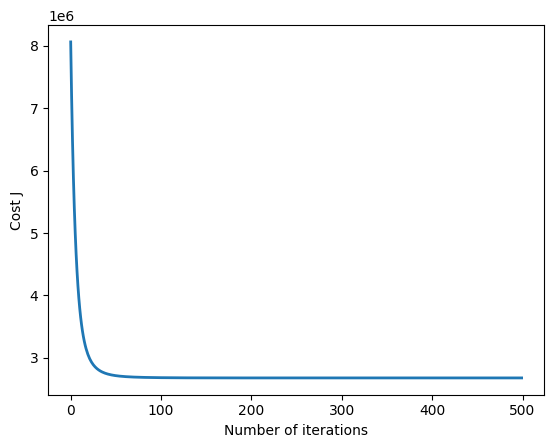

theta computed from gradient descent: [ 2886.7        -1557.57858858 -1401.95485815   773.89644806
  -504.51132843 -2059.68955746]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $3473


In [ ]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.1 #adjust this one
num_iters = 500 #adjust this one

# init theta and run gradient descent
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.
X_array = [1, 0, 0.2286, 39.6, 0.00253511, 123.465] #ต้องมี 1 นำหน้าเสมอ
X_array[1:6] = (X_array[1:6]- mu) / sigma
price = np.dot(X_array, theta)   

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

[0. 0. 0. ... 0. 0. 0.]
[ 28.867       -8.59377956  -0.17223873   4.18244065  -7.25411052
 -12.29640107]
[23.76839306  8.35532439 57.6344701  ... -7.48374121 39.14254467
  8.43902488]
[ 57.44533    -17.06966811  -0.43122391   8.34354644 -14.40970625
 -24.51173371]
[ 47.38981981  16.86810534 114.67678809 ... -14.78480032  77.86111859
  17.00423383]
[ 85.7378767  -25.42988486  -0.77508357  12.48336229 -21.46859873
 -36.64649217]
[ 70.86462182  25.53177802 171.13440865 ... -21.90794636 116.16145683
  25.68947142]
[113.74749793 -33.6766045   -1.20198084  16.60193457 -28.43256212
 -48.70117059]
[ 94.19315496  34.3399451  227.01467516 ... -28.85783884 154.04920137
  34.48875013]
[141.47702295 -41.81195814  -1.71011329  20.699311   -35.30333391
 -60.67626287]
[117.37578897  43.28637304 282.3248216  ... -35.63903003 191.52990277
  43.39624639]
[168.92925272 -49.83803418  -2.29771228  24.77554065 -42.08261576
 -72.57226255]
[140.412907    52.36498839 337.07197439 ... -42.25596731 228.60902184
 

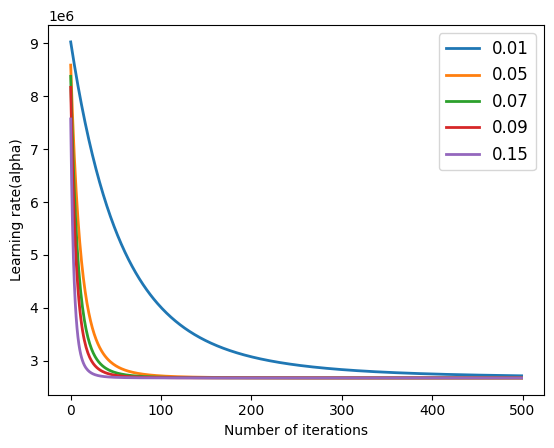

In [ ]:
# Plot several learning rates and choose the best one

num_iters = 500

# List of the learning rates
Alpha = [0.01, 0.05, 0.07, 0.09, 0.15]

for alpha in Alpha:
    theta = np.zeros(6)
    theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
    
    # Plot the convergence graph
    plt.plot(np.arange(len(J_history)), J_history, label=alpha, lw=2)
    plt.xlabel('Number of iterations')
    plt.ylabel('Learning rate(alpha)')
    plt.legend(loc='best', prop={'size': 12})

plt.show()

<blockquote> Normal Equation

In [ ]:
# Load data
data = np.loadtxt(r'D:\M.eng\Machine learning\ML_test_byme\data\LinearRegressionData.txt') #load data
# y = 1, x = 2 - 5
X = data[:, 1:6] #select column for data (ต้องถามว่าอะไรคือ X,y)
y = data[:, 0]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(X.T,X)),X.T),y) #มาจากตัวสมการthetaด้านบน
    
    # =================================================================
    return theta

In [ ]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
X_array = [1, 0, 0.2286, 39.6, 0.00253511, 123.465]
price = np.dot(X_array, theta)

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [ 41889.76259827   -263.27167364 -14999.16723634     49.70152079
 -38346.68715941   -298.5390667 ]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $3473
